<a href="https://colab.research.google.com/github/gojiteji/2019_Kakizome/blob/master/LSTM_MSE%3FDONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torch.optim as optimizers

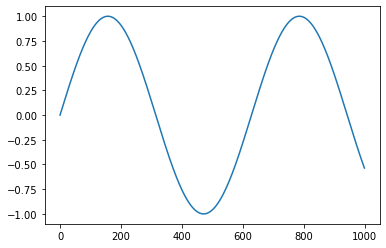

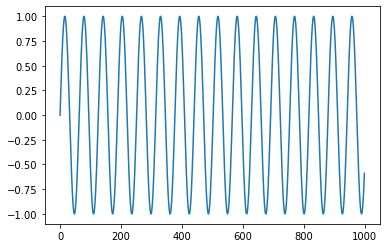

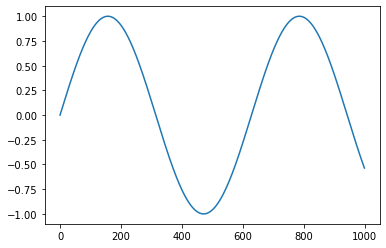

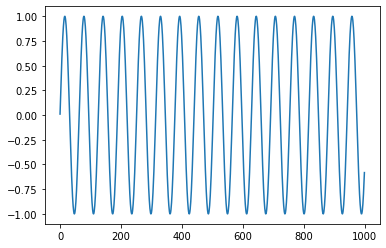

In [3]:
y_1=np.array([])
for i in range(1000):
    y_1=np.append(y_1,np.sin(i*0.01))
plt.plot(y_1)
plt.show()
y_2=np.array([])
for i in range(1000):
    y_2=np.append(y_2,np.sin(i*0.1))
plt.plot(y_2)
plt.show()
y=np.array([y_1,y_2])

t_1=np.array([])
for i in range(1000):
    t_1=np.append(t_1,np.sin(i*0.01+0.01))
plt.plot(y_1)
plt.show()
t_2=np.array([])
for i in range(1000):
    t_2=np.append(t_2,np.sin(i*0.1+0.01))
plt.plot(t_2)
plt.show()
t=np.array([t_1,t_2])


In [0]:
hidden_dim=100
latency_dim=100
class cVAE(nn.Module):
    def __init__(self, device='cuda'):
        super().__init__()
        self.device = device
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self,x):
        condition=torch.tensor([x[-1]],device="cuda")
        x_input=x[:-1].reshape(1,1,100)
        mean,var = self.encoder(x_input)
        #z = self.reparameterize(mean, var)
        z=torch.cat((mean.reshape(latency_dim),condition ))
        z= z.reshape(1,1,latency_dim+1)
        y = self.decoder(z)
        return y

    def reparameterize(self, mean, var):
        #eps = torch.randn(mean.size()).to(self.device)
        z = mean #+torch.sqrt(var) #* eps
        return z
    def lower_bound(self, x,t):
        condition=torch.tensor([x[-1]],device="cuda")
        x_input=x[:-1].reshape(1,1,100)
        mean, var = self.encoder(x_input)
        kl = - 1/2 * torch.mean(torch.sum(1 + torch.log(var)  - mean**2  - var))
        z = self.reparameterize(mean, var)

        z=torch.cat((z.reshape(latency_dim),condition ))

        z= z.reshape(1,1,latency_dim+1)

        y = self.decoder(z)
        reconst = torch.mean(torch.sum(t * torch.log(y) + (1 - t) * torch.log(1 - y)))
        L = reconst - kl


        return L


class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.batches=1
        self.hidden_dim  = hidden_dim
        self.latency_dim = latency_dim
        self.rnn1 = nn.RNN(input_size=100,#latency_dim+1,
                            hidden_size=self.hidden_dim,
                            num_layers=1,
                            nonlinearity='relu',
                            dropout=0.2,
                            batch_first=True
                            )
        self.rnn2 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn3 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn4 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn5 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn6 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn7 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn8 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        




        self.rnn_1 = nn.RNN(input_size=100,#latency_dim+1,
                            hidden_size=self.hidden_dim,
                            num_layers=1,
                            nonlinearity='relu',
                            dropout=0.2,
                            batch_first=True
                            )
        self.rnn_2 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn_3 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn_4 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn_5 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn_6 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn_7 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn_8 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        

        self.out_mean = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.latency_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.out_var = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.latency_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )

        self.l1 = nn.Linear(self.hidden_dim,self.hidden_dim)
        self.l2 = nn.Linear(self.hidden_dim,self.hidden_dim)
        self.l3 = nn.Linear(self.hidden_dim,self.hidden_dim)
        self.l4 = nn.Linear(self.hidden_dim,self.hidden_dim)
        self.l5 = nn.Linear(self.hidden_dim,self.hidden_dim)
        #self.out_mean =  nn.Linear(self.hidden_dim,self.latency_dim)
        #self.out_var1 =  nn.Linear(self.hidden_dim,self.latency_dim)
        #self.out_var2 = nn.ReLU()#Softplus()
    def forward(self,x):
        x1,_= self.rnn1(x.reshape(1,self.batches,100))
        x1,_= self.rnn2(x1.reshape(1,self.batches,self.hidden_dim))
        x1,_= self.rnn3(x1.reshape(1,self.batches,self.hidden_dim))
        x1,_= self.rnn4(x1.reshape(1,self.batches,self.hidden_dim))
        x1,_= self.rnn5(x1.reshape(1,self.batches,self.hidden_dim))
        x1,_= self.rnn6(x1.reshape(1,self.batches,self.hidden_dim))
        x1,_= self.rnn7(x1.reshape(1,self.batches,self.hidden_dim))
        x1,_= self.rnn8(x1.reshape(1,self.batches,self.hidden_dim))


        x2,_= self.rnn_2(x.reshape(1,self.batches,100))
        x2,_= self.rnn_3(x2.reshape(1,self.batches,self.hidden_dim))
        x2,_= self.rnn_4(x2.reshape(1,self.batches,self.hidden_dim))
        x2,_= self.rnn_4(x2.reshape(1,self.batches,self.hidden_dim))
        x2,_= self.rnn_5(x2.reshape(1,self.batches,self.hidden_dim))
        x2,_= self.rnn_6(x2.reshape(1,self.batches,self.hidden_dim))
        x2,_= self.rnn_7(x2.reshape(1,self.batches,self.hidden_dim))
        x2,_= self.rnn_8(x2.reshape(1,self.batches,self.hidden_dim))



        mean,_ = self.out_mean(x1)
        mean = mean.reshape(latency_dim)
        var,_ = self.out_mean(x2)
        var = var.reshape(latency_dim)
        return mean,var


class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.batches=1
        self.hidden_dim  =hidden_dim 
        self.latency_dim =latency_dim
        self.rnn1 = nn.RNN(input_size=latency_dim+1,
                            hidden_size=self.hidden_dim,
                            num_layers=1,
                            nonlinearity='relu',
                            dropout=0.2,
                            batch_first=True
                            )
        self.rnn2 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn3 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn4 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn5 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn6 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn7 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )
        self.rnn8 = nn.RNN(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            nonlinearity='relu',
                            dropout=0.2,
                            num_layers=1, 
                            batch_first=True
                            )

        self.l0 = nn.Linear(latency_dim+1,self.hidden_dim)
        self.l1 = nn.Linear(self.hidden_dim,self.hidden_dim)
        self.l2 = nn.Linear(self.hidden_dim,self.hidden_dim)
        self.l3 = nn.Linear(self.hidden_dim,self.hidden_dim)
        self.l4 = nn.Linear(self.hidden_dim,self.hidden_dim)
        self.l5 = nn.Linear(self.hidden_dim,1)
        self.out= nn.Sigmoid()
    def forward(self,x):
        #x  = self.l0(x)
        x,_= self.rnn1(x.reshape(1,self.batches,latency_dim+1))
        #x  = self.l1(x.reshape(self.batches,self.hidden_dim))
        x,_= self.rnn2(x.reshape(1,self.batches,self.hidden_dim))
        #x  = self.l2(x.reshape(self.batches,self.hidden_dim))
        x,_= self.rnn3(x.reshape(1,self.batches,self.hidden_dim))
        #x  = self.l3(x.reshape(self.batches,self.hidden_dim))
        x,_= self.rnn4(x.reshape(1,self.batches,self.hidden_dim))
        #x  = self.l4(x.reshape(self.batches,self.hidden_dim))
        #x,_= self.rnn5(x.reshape(1,self.batches,self.hidden_dim))
        x,_= self.rnn5(x.reshape(1,self.batches,self.hidden_dim))
        #x  = self.l4(x.reshape(self.batches,self.hidden_dim))
        #x,_= self.rnn5(x.reshape(1,self.batches,self.hidden_dim))
        x,_= self.rnn6(x.reshape(1,self.batches,self.hidden_dim))
        #x  = self.l4(x.reshape(self.batches,self.hidden_dim))
        #x,_= self.rnn5(x.reshape(1,self.batches,self.hidden_dim))
        x,_= self.rnn7(x.reshape(1,self.batches,self.hidden_dim))
        #x  = self.l4(x.reshape(self.batches,self.hidden_dim))
        #x,_= self.rnn5(x.reshape(1,self.batches,self.hidden_dim))
        x,_= self.rnn8(x.reshape(1,self.batches,self.hidden_dim))
        #x  = self.l4(x.reshape(self.batches,self.hidden_dim))
        #x,_= self.rnn5(x.reshape(1,self.batches,self.hidden_dim))

        x  = self.l5(x.reshape(self.batches,self.hidden_dim))

        #x = self.out(x.reshape(1))
        return x

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Cost: 1383.986
Epoch: 2, Cost: 519.407
Epoch: 3, Cost: 288.940
Epoch: 4, Cost: 113.956
Epoch: 5, Cost: 18.432
Epoch: 6, Cost: 3.949
Epoch: 7, Cost: 1.910
Epoch: 8, Cost: 0.967
Epoch: 9, Cost: 0.464
Epoch: 10, Cost: 0.204
Epoch: 11, Cost: 0.092
Epoch: 12, Cost: 0.048
Epoch: 13, Cost: 0.036
Epoch: 14, Cost: 0.126
Epoch: 15, Cost: 0.363
Epoch: 16, Cost: 0.236
Epoch: 17, Cost: 0.385
Epoch: 18, Cost: 0.304
Epoch: 19, Cost: 0.132
Epoch: 20, Cost: 0.043


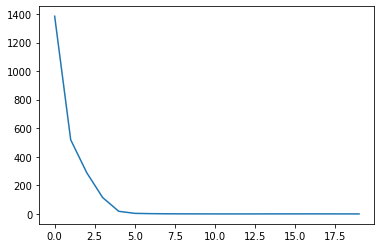

In [157]:
device = torch.device('cuda' )
model = cVAE().to(device)


criterion = nn.MSELoss()#model.lower_bound
optimizer = optimizers.Adam(model.parameters(),lr=0.0000001)
def compute_loss(X,T):
    return -1 * criterion(X,T)
def train_step(X,T):
    model.train()
    out=model(X)#loss内部で潤伝播してる
    loss=criterion(out,T)
    #loss=compute_loss(X,T)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss
epochs =20
histories=np.array([])
#send_line_notification("new training")
#バッチ正規化したいけど、たまに前のデータでtが1を超えるため、事前に正規化
top=y.max()
bottom=y.min()
for epoch in range(epochs):
    train_loss = 0.
    for (in_data,num) in zip(  [y[1]],torch.tensor([[0.],[1.]]).to(device)  ):
        for i in range(899):#0~899まで1bitずつ移動して次を生成していく
            #入力は変文下界のためにかさ上げしようね
            X = torch.tensor(in_data[i:i+100],dtype=torch.float, requires_grad=True).to(device)
            T = torch.tensor(in_data[i+100],dtype=torch.float, requires_grad=True).to(device)
            X = (X-bottom)
            X = X/top
            T = (T-bottom)/top
            X = torch.cat((X,num))
            loss = train_step(X,T)#ベクトル,スカラー
            train_loss +=loss.item()
    #if(epoch%1==0):
    print('Epoch: {}, Cost: {:.3f}'.format(epoch+1,train_loss))
    histories=np.append(histories,train_loss)
    #send_line_notification(histories[-1])
plt.plot(histories)
plt.show()

In [0]:
model.encoder(X[:-1].reshape(1,1,100))

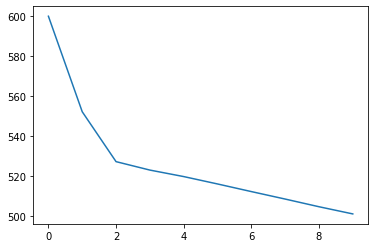

In [127]:
plt.plot(histories)
plt.show()

In [0]:
import requests
def send_line_notification(message):
    line_token = 'noMHGVZHuUriQ4XLftCl97kyA5mMdVa9XIl5TDYmJT6'
    endpoint = 'https://notify-api.line.me/api/notify'
    message = "\n{}".format(message)
    payload = {'message': message}
    headers = {'Authorization': 'Bearer {}'.format(line_token)}
    requests.post(endpoint, data=payload, headers=headers)

In [0]:
send_line_notification("1000 finished!")

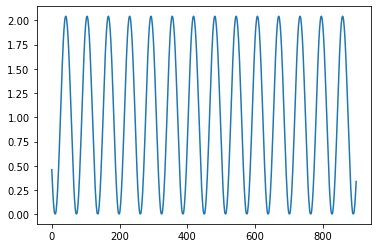

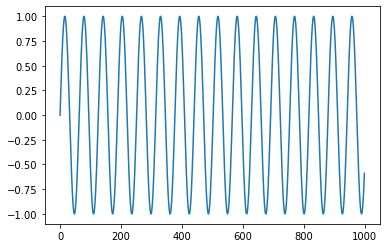

In [158]:
model.eval()
test=np.array([])
for i in range(899):
    s=model((torch.tensor(np.append([y[1,i:i+100].reshape(1,100)],[0]),dtype=torch.float, requires_grad=True).to(device) -bottom)*top  ).detach().cpu().numpy()
    test=np.append(test,s)
plt.plot(test)
plt.show()
plt.plot(y[1])
plt.show()